# Notebook for examples of intergation of systems of ODEs

## Python initialization

In [1]:
import numpy as np #initialization
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import time # note the new module
 
%matplotlib inline 

## Defining the Predator-Prey growth function

In [2]:
def PredatorPrey(Population, t, r, a, b, d):
    """
    this function returns the growth rate of two populations in the Predator-Prey model as a numpy array
    
    PredatorPrey(Population, t, args):

        Population -- an array of 2 numbers -- predator and prey current population sizes
        t -- time, unused
        (r, a, b, d) - the parameters of the population dynamics as described in the lecture
    """
    
    dx = Population[0]*(r-a*Population[1])
    dy = Population[1]*(b*Population[0]-d)
    
    return np.array((dx,dy))

## Integrator functions

In [3]:
def EulerSystem(xPrime, x0, t, args=()):
    """
    Solves a system of ODEs using the Euler method.
    
    EulerSystem(xPrime,t0=0.0,x0=0.0,T=1.0,dt=0.1)
        xPrime -- the system to be integrated, returns the array of derivatives
        t -- the array of time points where the solution is needed; the zeroth entry corresponds to x0
        x0 -- initial condition
        
    Note that we do not ask for dt in this implementation of the algorithm
    """
    
    x = np.zeros((t.size, x0.size))
    x[0,:] = x0
    for i in range(1, t.size):
        dt = t[i] - t[i-1]
        x[i,:] = x[i-1,:] + dt * xPrime(x[i-1,:],t[i-1],*args)

    return x

In [4]:
def RK2Arg(xPrime, x0, t, args=()):
    """
    Solves 1-d ODE using the Runge-Kutta 2 method.
    """
    x = np.zeros((t.size, x0.size))
    x[0,:] = x0
    for i in range(1, t.size):
        fx = xPrime(x[i-1,:], t[i-1], *args)
        guess = x[i-1,:] + dt * fx
        fxdx = xPrime(guess, t[i-1], *args)
        x[i] = x[i-1,:]+0.5*(fx+fxdx)*dt

    return x

## Constant intialization

In [5]:
dt = 1e-4 # time step
SimulationTime = 10.0 # time to solve for
r = 7.0 # intitalization of the 4 parameters
a = 2.0
b = 0.5
d = 1.0  
P0 = np.array((10,1))  # initial population size
         

## Running various integrators and comparing them

Euler took 1.293243169784546s to run.
Odeint took 0.017435789108276367s to run.
RK2 took 2.2655060291290283s to run.


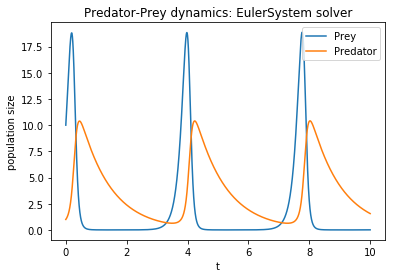

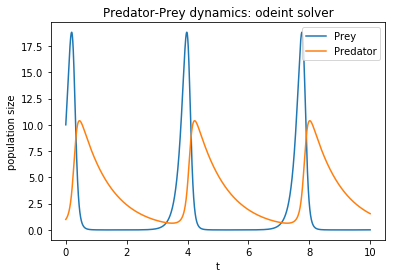

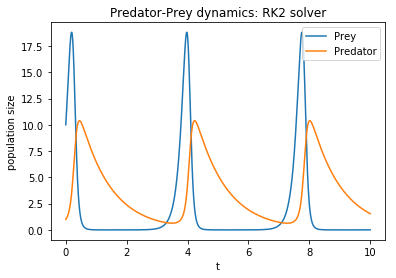

In [6]:
t=np.arange(0,SimulationTime,dt)

tt1 = time.time() # initial time
PEuler = EulerSystem(PredatorPrey, P0, t, args=(r,a,b,d))
tt2 = time.time() # time after euler
POdeInt = odeint(PredatorPrey, P0, t, args=(r,a,b,d))
tt3 = time.time() # time after odeint
PRK2 = RK2Arg(PredatorPrey, P0, t, args=(r,a,b,d))
tt4 = time.time()


print('Euler took ', tt2-tt1, 's to run.', sep='' )
print('Odeint took ', tt3-tt2, 's to run.', sep='' )
print('RK2 took ', tt4-tt3, 's to run.', sep='' )


plt.plot(t, PEuler[:,0],label='Prey')
plt.plot(t, PEuler[:,1],label='Predator')
plt.legend()
plt.title('Predator-Prey dynamics: EulerSystem solver')
plt.xlabel('t')
plt.ylabel('population size')
plt.show()

plt.plot(t, POdeInt[:,0],label='Prey')
plt.plot(t, POdeInt[:,1],label='Predator')
plt.legend()
plt.title('Predator-Prey dynamics: odeint solver')
plt.xlabel('t')
plt.ylabel('population size')
plt.show()

plt.plot(t, PRK2[:,0],label='Prey')
plt.plot(t, PRK2[:,1],label='Predator')
plt.legend()
plt.title('Predator-Prey dynamics: RK2 solver')
plt.xlabel('t')
plt.ylabel('population size')
plt.show()
